# Emotion Detection

**Importing Required Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow Version: ", tf.__version__)


Tensorflow Version:  2.15.0


**Exploring Dataset**

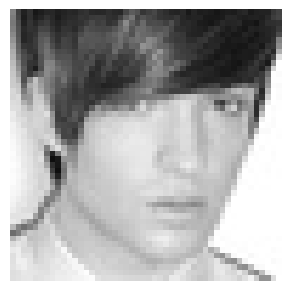

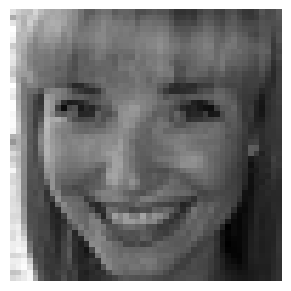

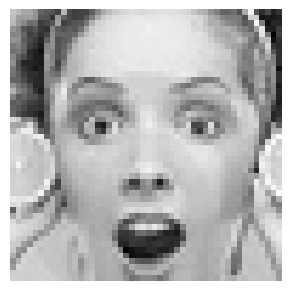

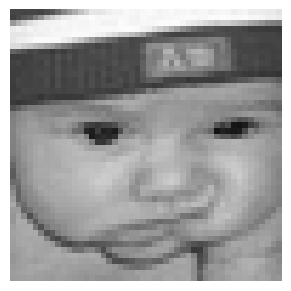

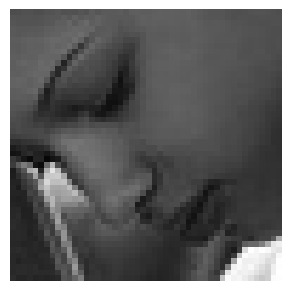

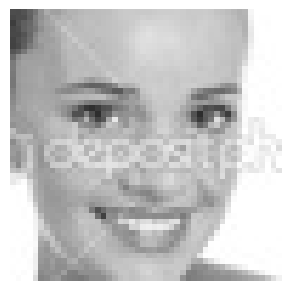

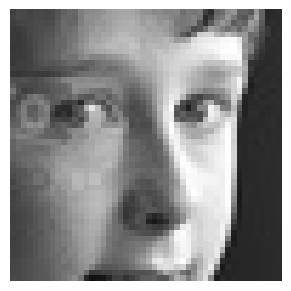

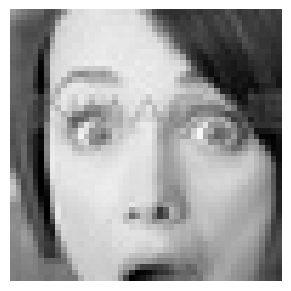

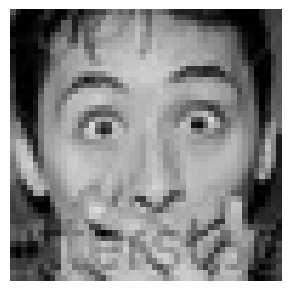

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis("off")

In [3]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",target_size=(img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
train_validation = datagen_train.flow_from_directory("test/",target_size=(img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining our Model**

In [4]:
# First create 2 layers 
def convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = convolution(inputs, 32, (3,3))
    conv_2 = convolution(conv_1, 64, (5,5))
    conv_3 = convolution(conv_2, 128, (3,3))
    
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)
    
    output = Dense(7, activation='softmax')(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ["categorical_crossentropy"], optimizer = "adam", metrics = ["accuracy"])
    
    return model

In [7]:
model = model_fer((48,48,1))
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0  

**Intializing the Model**

In [8]:
epochs = 25
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = train_validation.n//train_validation.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor = "val_accuracy", save_weight_only = True, mode = "max", verbose = 1)
callbacks = [checkpoint]

# Traning the Model

In [9]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = train_validation,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/25


448/448 [==============================] - ETA: 0s - loss: 1.6656 - accuracy: 0.3654
Epoch 1: saving model to model_weights.h5


D:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


448/448 [==============================] - 726s 2s/step - loss: 1.6656 - accuracy: 0.3654 - val_loss: 1.4804 - val_accuracy: 0.4224
Epoch 2/25
448/448 [==============================] - ETA: 0s - loss: 1.3800 - accuracy: 0.4729
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 324s 725ms/step - loss: 1.3800 - accuracy: 0.4729 - val_loss: 1.3293 - val_accuracy: 0.4854
Epoch 3/25
448/448 [==============================] - ETA: 0s - loss: 1.2673 - accuracy: 0.5182
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 247s 550ms/step - loss: 1.2673 - accuracy: 0.5182 - val_loss: 1.2696 - val_accuracy: 0.5035
Epoch 4/25
448/448 [==============================] - ETA: 0s - loss: 1.2014 - accuracy: 0.5429
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 69s 154ms/step - loss: 1.2014 - accuracy: 0.5429 - val_loss: 1.2962 - val_accuracy: 0.4969
Epoch 5/25
448/448 [==============================

**Model Evaluation**

In [10]:
model.evaluate(train_validation)

113/113 [==============================] - 5s 43ms/step - loss: 1.2713 - accuracy: 0.5991


[1.2713276147842407, 0.5990526676177979]

**Plotting Loss**

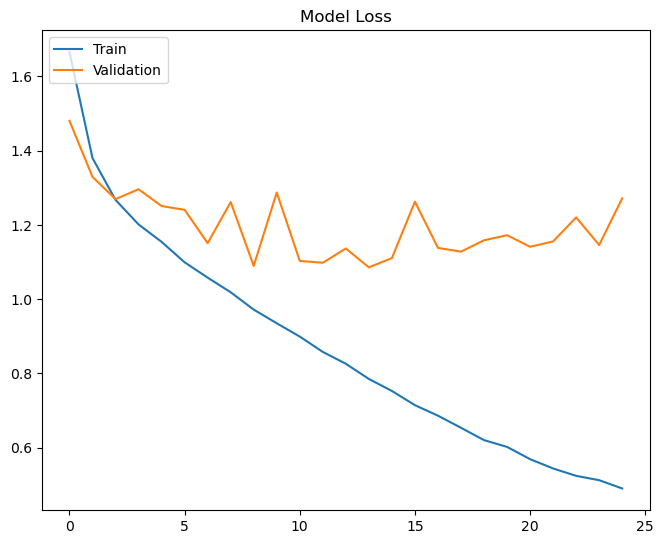

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

**Plotting Accuracy**

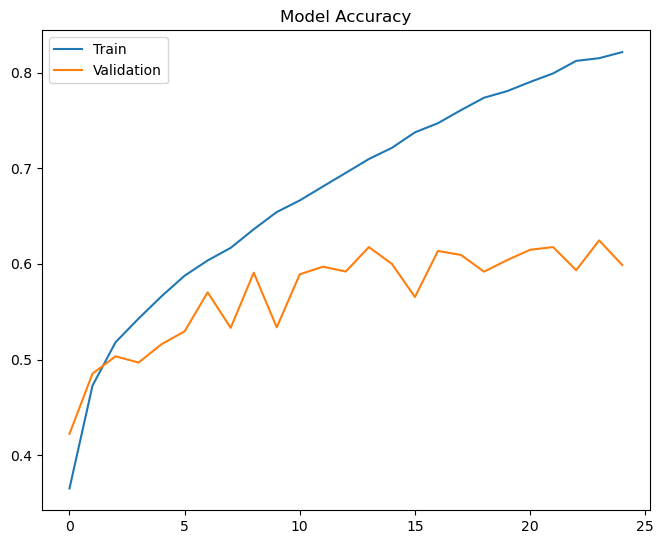

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

**Saving Model**

In [14]:
model_json = model.to_json()
with open("model_a1.json", "w") as json_file:
    json_file.write(model_json)